In [1]:
from natural_pdf import PDF
import pandas as pd

[2025-08-12 12:38:39,603] [ WARNING] surya.py:27 - Could not import Surya dependencies (layout and/or table_rec): No module named 'surya.common'


In [2]:
import os
pdf_folder = "pdfs_final"
pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])[:5]

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    print(f"Processing: {filename}")
    
    pdf = PDF(filepath)
    
    if not pdf.pages:
        print("No pages found in this PDF.")
        continue
    
    try:
        page = pdf.pages[2] 

        page.find("text").show()
    
    except IndexError:
        print(" This PDF has fewer than 3 pages.")

Processing: 1_-_DI_CA_Test.pdf
Processing: Abilene_Christian_University.pdf
Processing: Alabama_A&M_University.pdf
Processing: Alabama_State_University.pdf
Processing: Alcorn_State_University.pdf


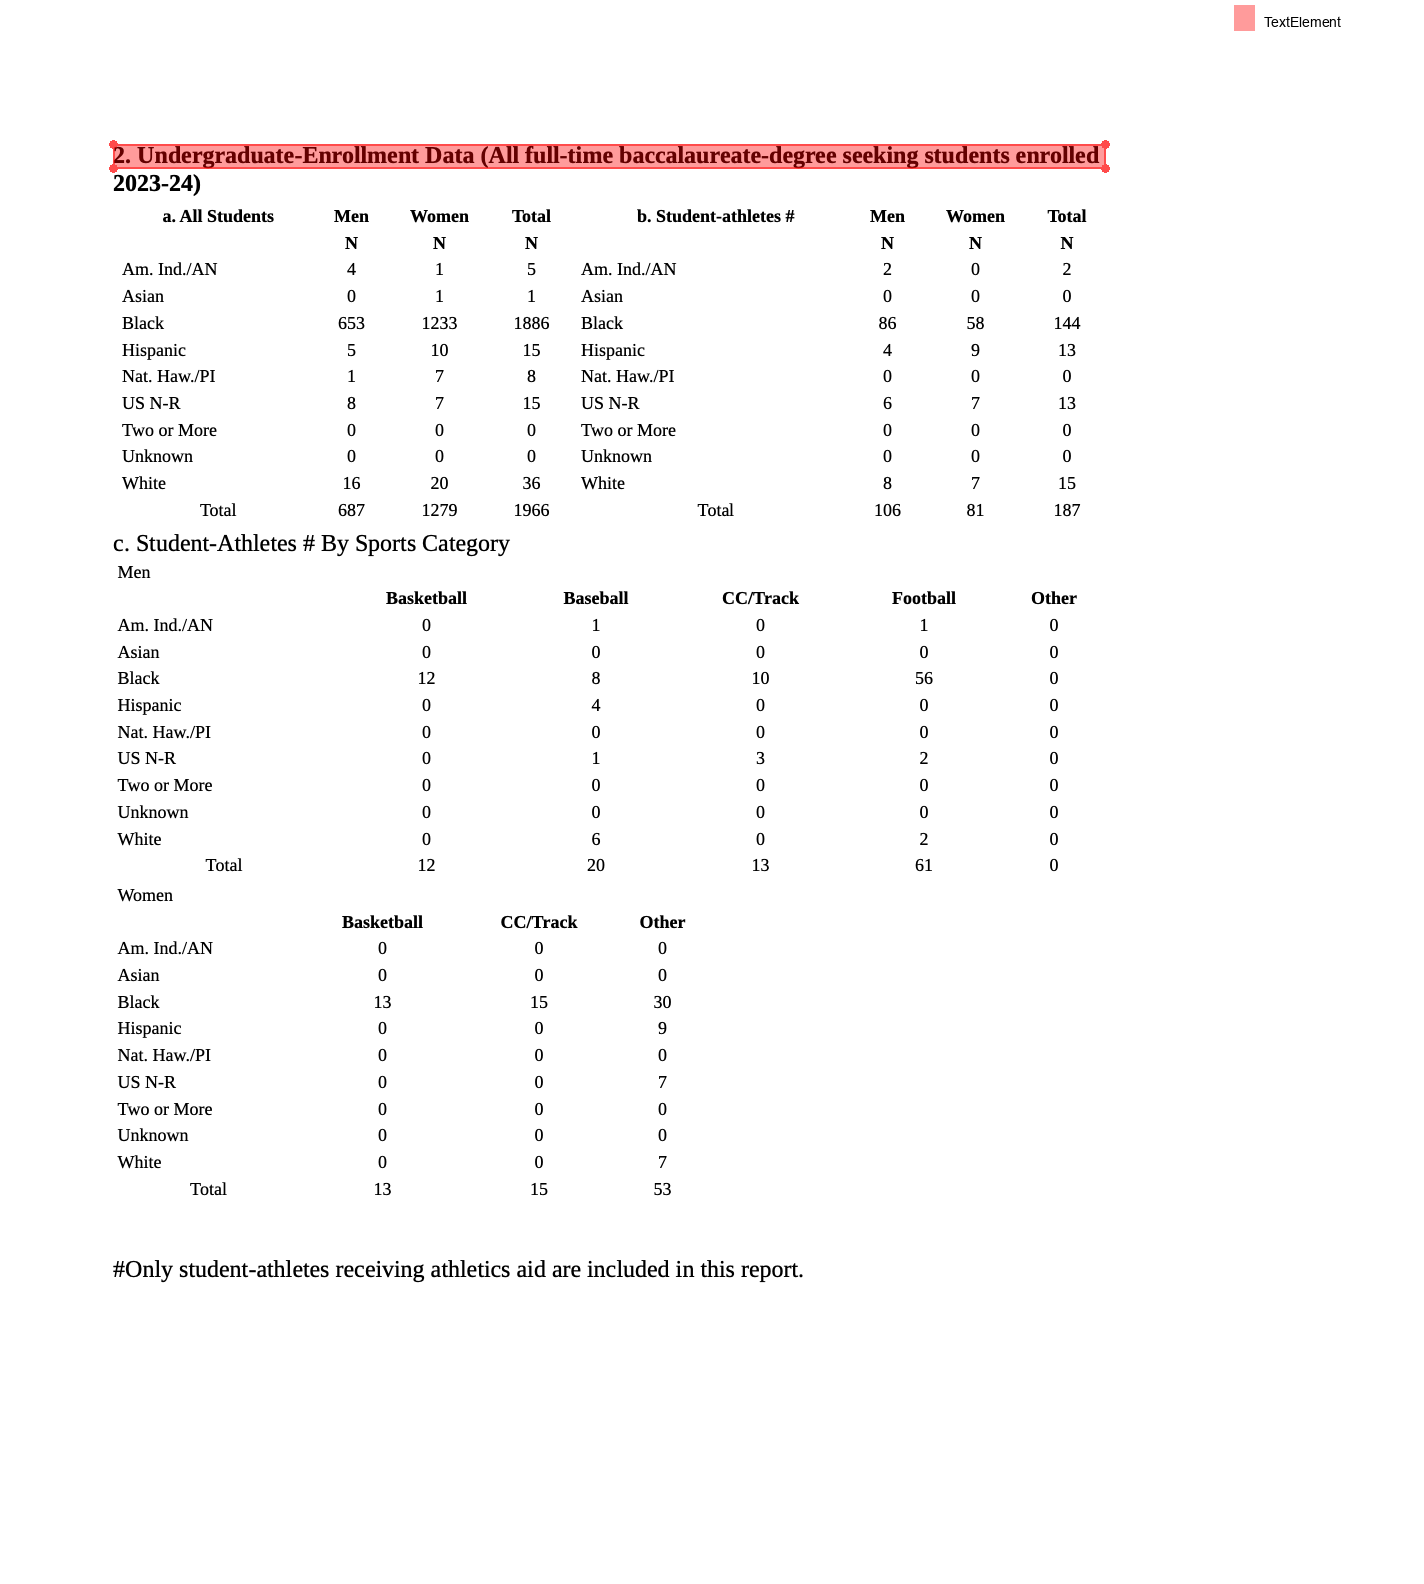

In [4]:
page.find('text').show()

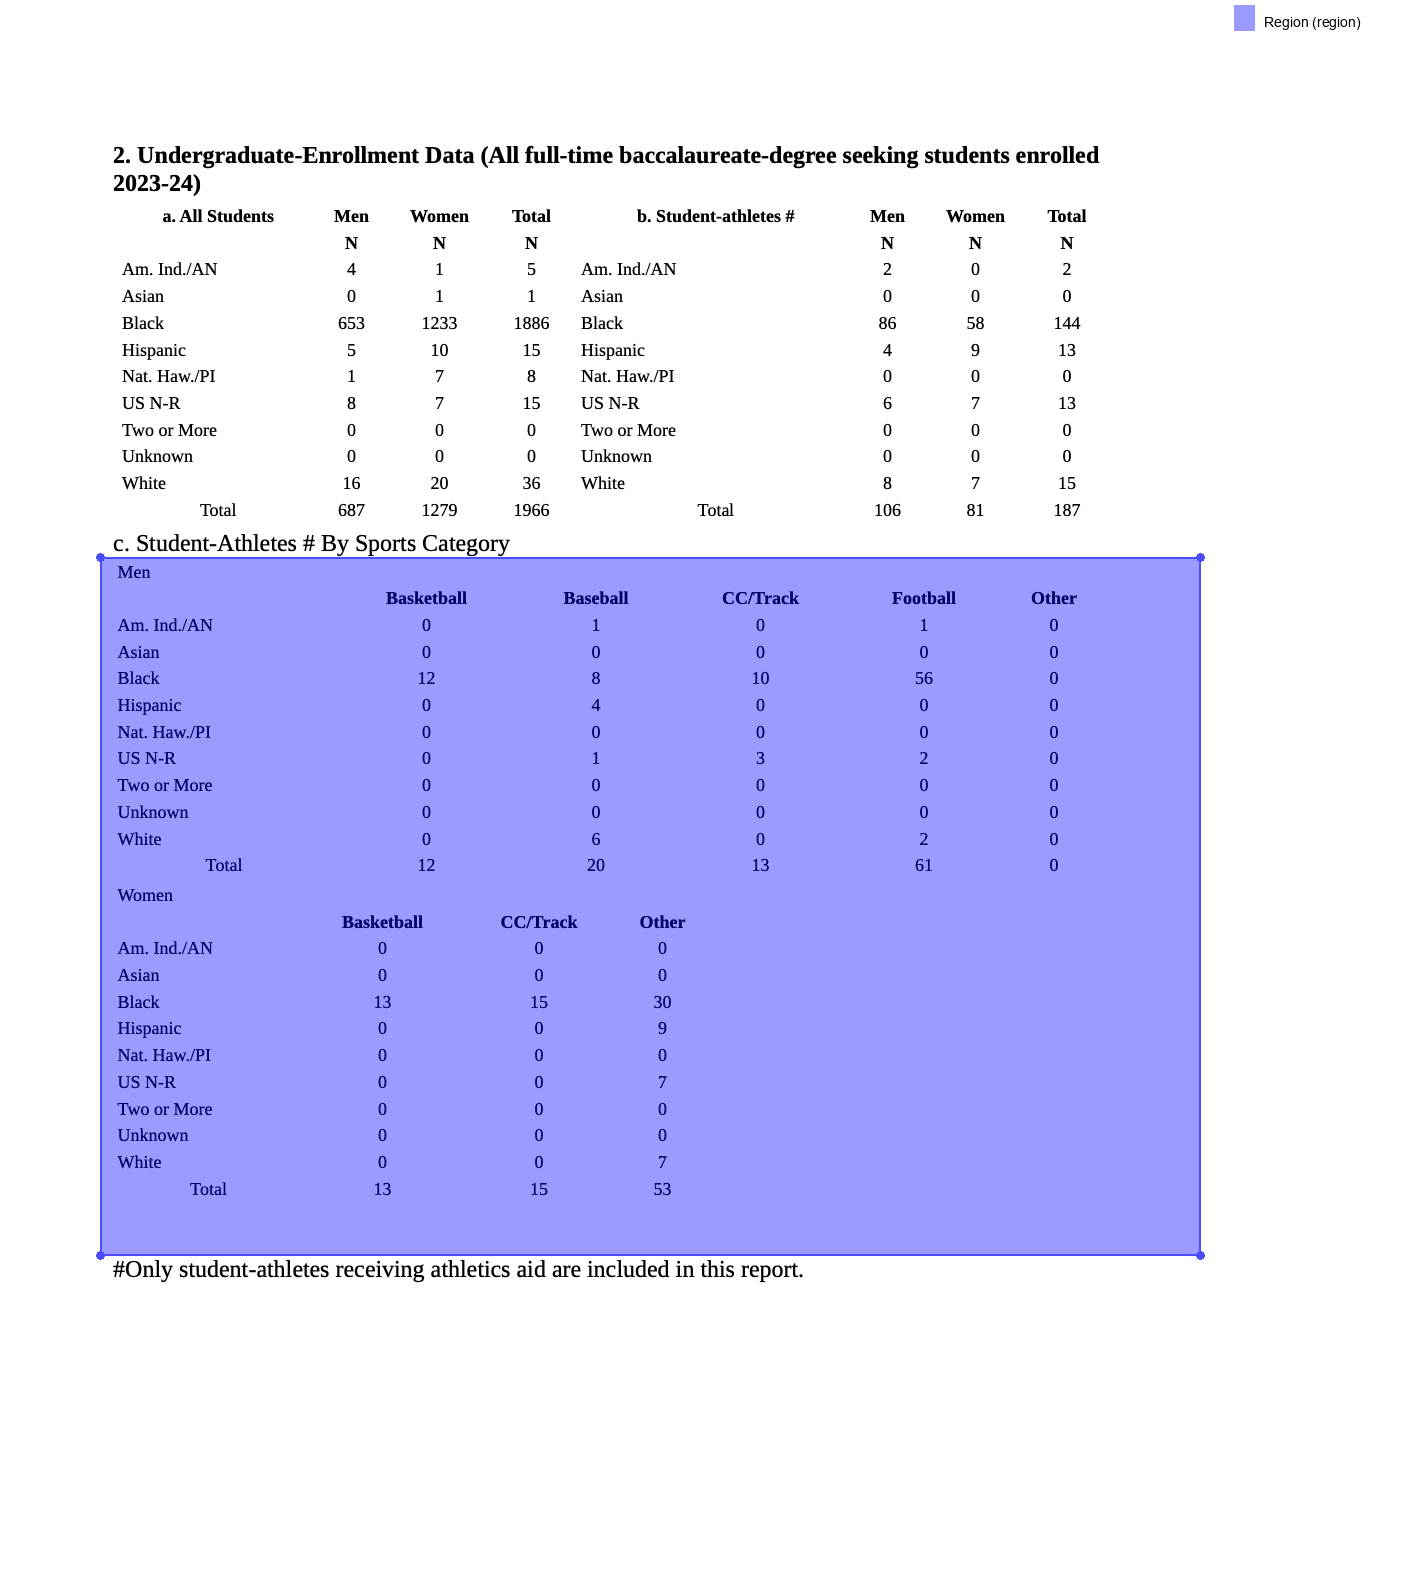

In [7]:
(
    page
    .find("text:contains(\"Student-Athletes #\")")
    .below(
        until="text:contains(\"#Only student-athletes\")",
        include_endpoint=False
    )
    .clip(left=50, right=600)
    .show()
)

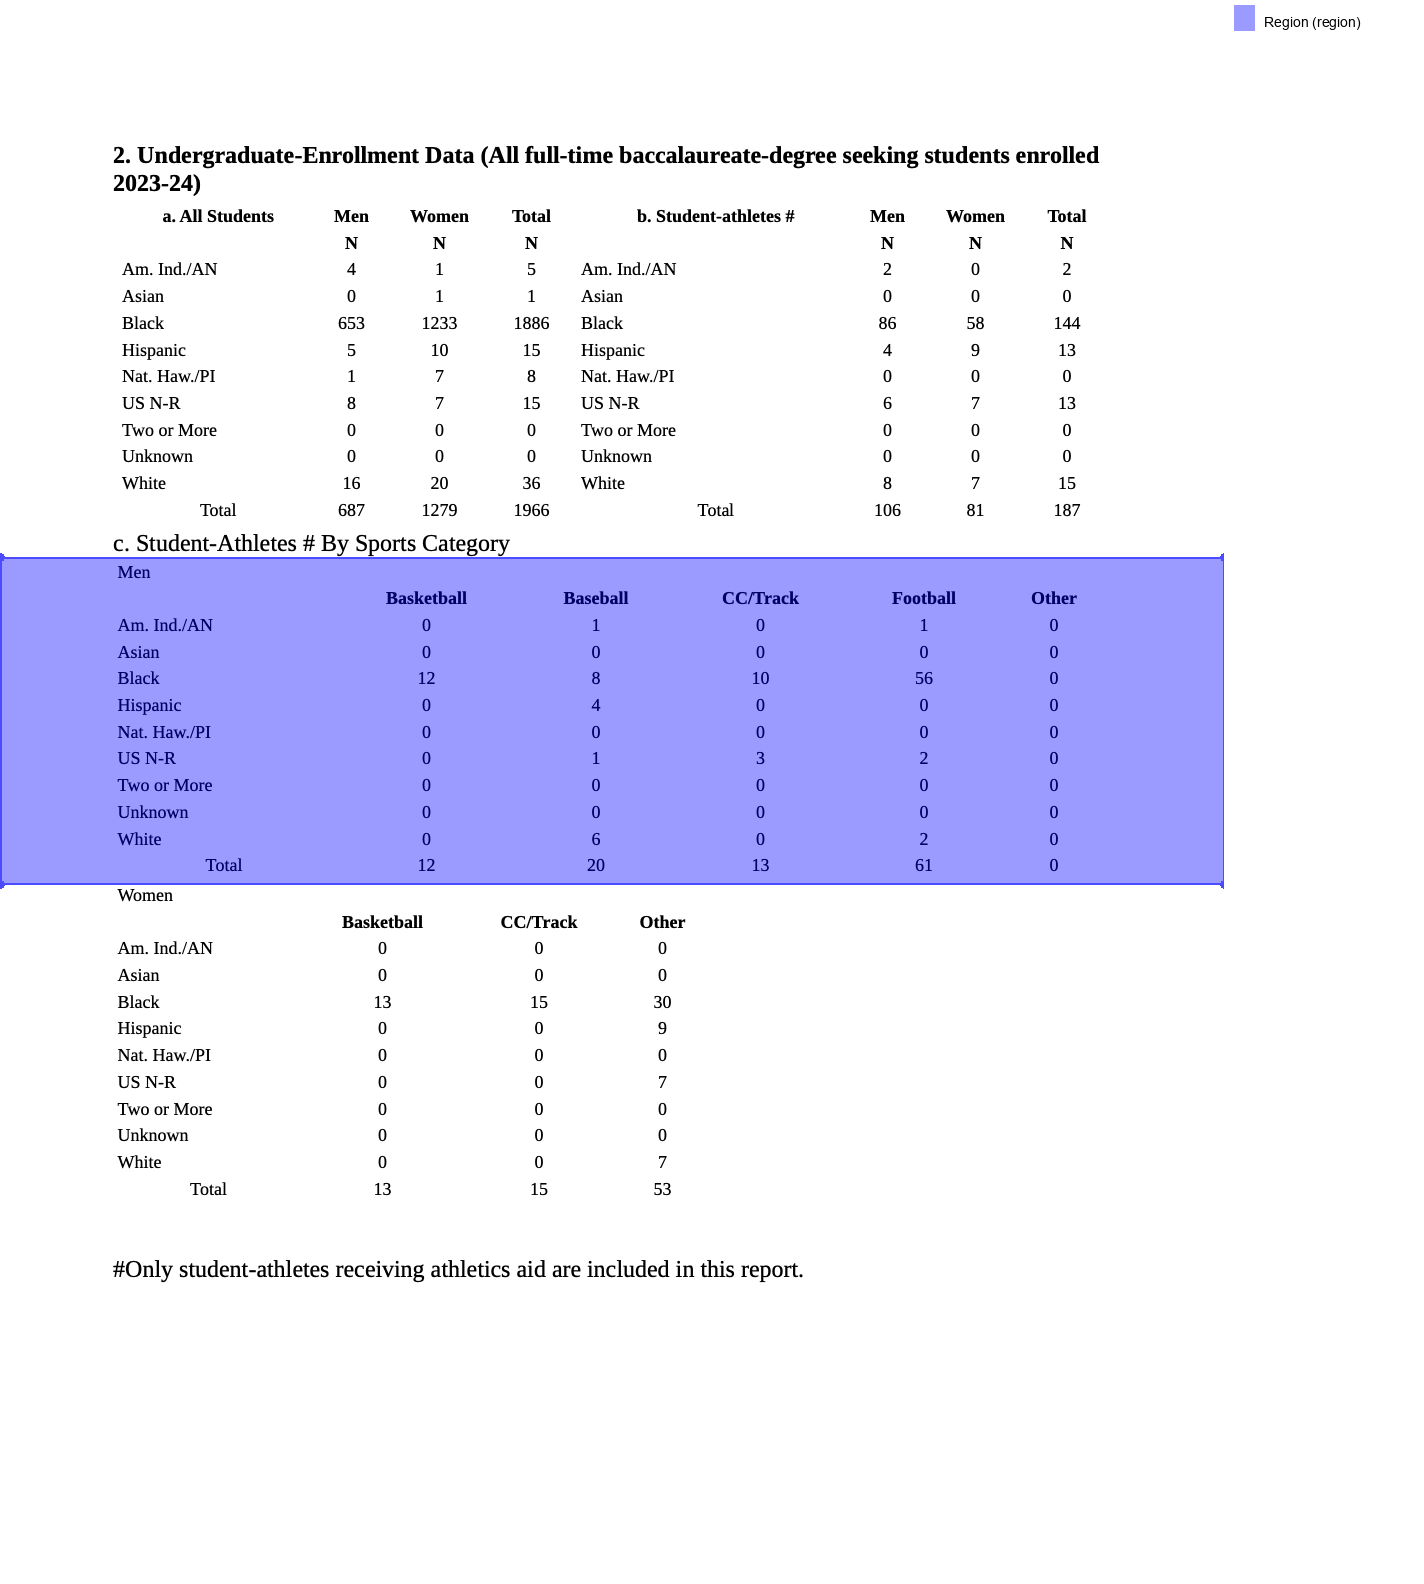

In [18]:
table = (
    page

    .find("text:contains(\"Student-Athletes #\")")
    .below(
        until="text:contains(\"Women\")",
        include_endpoint=False
    )

)
table.show()

In [19]:
rows = table.extract_table(table_settings={'snap_y_tolerance': 5})
rows

[['Men', '', '', '', '', ''],
 ['', 'Basketball', 'Baseball', 'CC/Track', 'Football', 'Other'],
 ['Am. Ind./AN', '0', '1', '0', '1', '0'],
 ['Asian', '0', '0', '0', '0', '0'],
 ['Black', '12', '8', '10', '56', '0'],
 ['Hispanic', '0', '4', '0', '0', '0'],
 ['Nat. Haw./PI', '0', '0', '0', '0', '0'],
 ['US N-R', '0', '1', '3', '2', '0'],
 ['Two or More', '0', '0', '0', '0', '0'],
 ['Unknown', '0', '0', '0', '0', '0'],
 ['White', '0', '6', '0', '2', '0'],
 ['Total', '12', '20', '13', '61', '0']]

In [3]:
pdf_folder = "pdfs_final"
pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])[:5]

all_data = []

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    school_name = filename.replace(".pdf", "").replace("_", " ").strip()

    try:
        pdf = PDF(filepath)
        if not pdf.pages:
            print(f"No pages found in {filename}")
            continue

        page = pdf.pages[2] 

        table = (
            page
            .find("text:contains(\"Student-Athletes #\")")
            .below(until="text:contains(\"Women\")", include_endpoint=False)
        )

        rows = table.extract_table(table_settings={"snap_y_tolerance": 5})
        if not rows or len(rows) < 3:
            print(f"Not enough data rows in {filename}")
            continue

        base_header = rows[0][1:]
        sub_header = rows[1][1:]
        combined_cols = [f"Men {b} {s}" for b, s in zip(base_header, sub_header)]
        full_header = ['Race'] + combined_cols
        data = rows[2:]

        df = pd.DataFrame(data, columns=full_header)
        df["School"] = school_name
        df["Sport Category"] = "Men"

        all_data.append(df)

    except Exception as e:
        print(f"Error processing {filename}: {e}")

final_df = pd.concat(all_data, ignore_index=True)
final_df.head()

KeyboardInterrupt: 

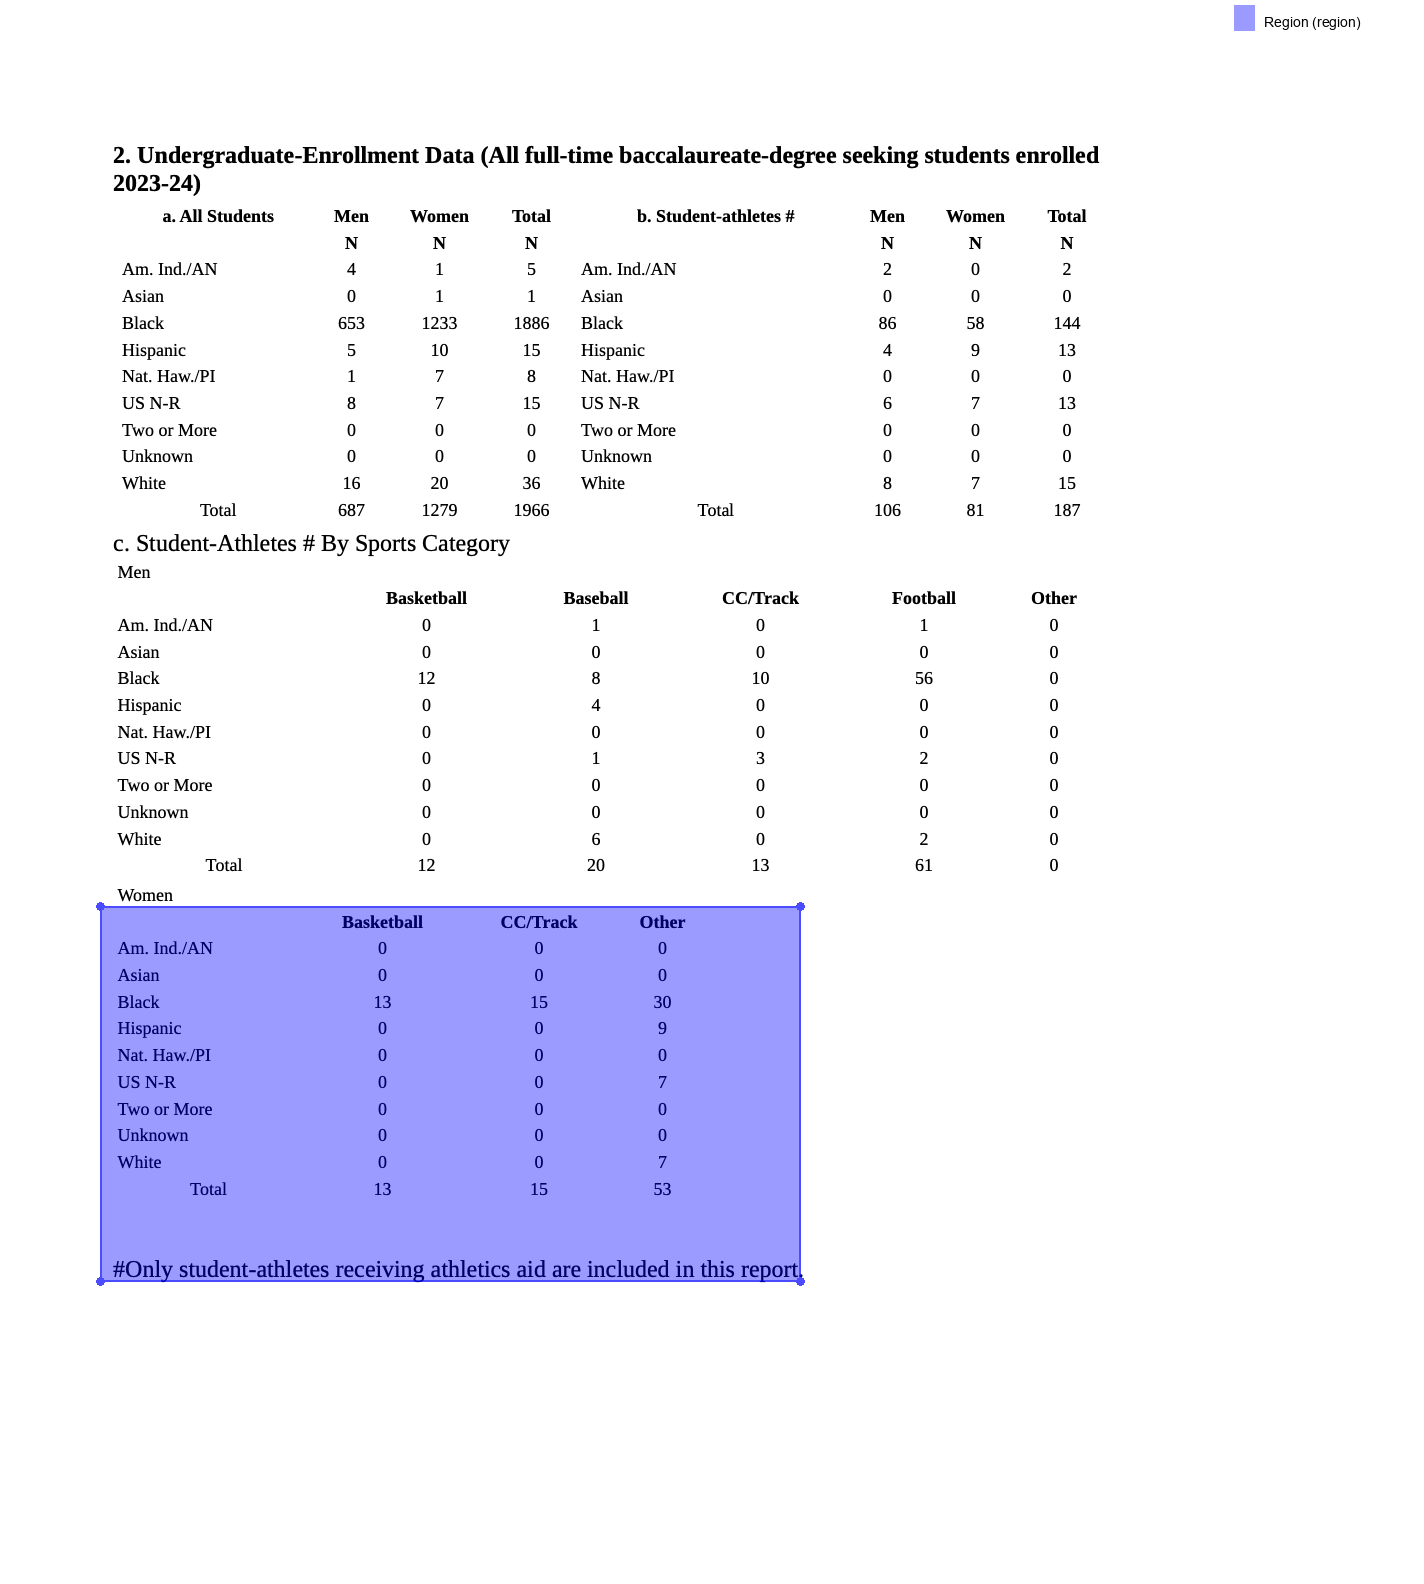

In [37]:
table_2 = (
    page
    .find_all("text:contains('Women')")[-1] 
    .below(until="text:contains('Only student-athletes')")
    .clip(left=50, right=400)
)
table_2.show()


In [38]:
rows2 = table_2.extract_table(table_settings={"snap_y_tolerance": 5})
rows2

[['', 'Basketball', 'CC/Track', 'Other'],
 ['Am. Ind./AN', '0', '0', '0'],
 ['Asian', '0', '0', '0'],
 ['Black', '13', '15', '30'],
 ['Hispanic', '0', '0', '9'],
 ['Nat. Haw./PI', '0', '0', '0'],
 ['US N-R', '0', '0', '7'],
 ['Two or More', '0', '0', '0'],
 ['Unknown', '0', '0', '0'],
 ['White', '0', '0', '7'],
 ['Total', '13', '15', '53']]

In [40]:
header2 = rows2[0]             
data2 = rows2[1:]        
df2 = pd.DataFrame(data2, columns=header2)
df2

,,Basketball,CC/Track,Other
0,Am. Ind./AN,0,0,0
1,Asian,0,0,0
2,Black,13,15,30
3,Hispanic,0,0,9
4,Nat. Haw./PI,0,0,0
5,US N-R,0,0,7
6,Two or More,0,0,0
7,Unknown,0,0,0
8,White,0,0,7
9,Total,13,15,53


In [43]:
pdf_folder = "pdfs_final"
pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])[:5]

all_data = []

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    school_name = filename.replace(".pdf", "").replace("_", " ").strip()

    try:
        pdf = PDF(filepath)
        if not pdf.pages:
            print(f"No pages found in {filename}")
            continue

        page = pdf.pages[2] 

        table = (
            page
            .find_all("text:contains('Women')")[-1]
            .below(until="text:contains('Only student-athletes')")
            .clip(left=50, right=400)
        )

        rows2 = table.extract_table(table_settings={"snap_y_tolerance": 5})
        if not rows2 or len(rows2) < 2:
            print(f"Not enough data rows in {filename}")
            continue

        header2 = rows2[0]
        data2 = rows2[1:]

        df2 = pd.DataFrame(data2, columns=header2)
        df2["School"] = school_name
        df2["Sport Category"] = "Women"

        all_data.append(df2)

    except Exception as e:
        print(f"Error processing {filename}: {e}")

final_df2 = pd.concat(all_data, ignore_index=True)
final_df2.head()

,,Basketball,CC/Track,Other,School,Sport Category
0,Am. Ind./AN,0,0,0,1 - DI CA Test,Women
1,Asian,0,0,0,1 - DI CA Test,Women
2,Black,0,0,0,1 - DI CA Test,Women
3,Hispanic,0,0,0,1 - DI CA Test,Women
4,Nat. Haw./PI,0,0,0,1 - DI CA Test,Women


In [47]:
pdf_folder = "pdfs_final"
pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])[:20]

all_data = []

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    school_name = filename.replace(".pdf", "").replace("_", " ").strip()

    try:
        pdf = PDF(filepath)
        if not pdf.pages:
            print(f"No pages found in {filename}")
            continue

        page = pdf.pages[2]

        table = (
            page
            .find("text:contains(\"Student-Athletes #\")")
            .below(until="text:contains(\"Women\")", include_endpoint=False)
        )

        rows = table.extract_table(table_settings={"snap_y_tolerance": 5})
        if not rows or len(rows) < 3:
            print(f"Not enough data rows in {filename}")
            continue
        base_header = rows[0][1:]
        sub_header = rows[1][1:]
        combined_cols = [f"Men {b} {s}" for b, s in zip(base_header, sub_header)]
        full_header = ['Race'] + combined_cols
        data = rows[2:]

        df = pd.DataFrame(data, columns=full_header)
        df["School"] = school_name
        df["Sport Category"] = "Men"

        all_data.append(df)

    except Exception as e:
        print(f"Error processing {filename}: {e}")

final_men_df = pd.concat(all_data, ignore_index=True)

final_men_df.head(20)

,Race,Men Basketball,Men Baseball,Men CC/Track,Men Football,Men Other,School,Sport Category
0,Am. Ind./AN,0,0,0,0,0,1 - DI CA Test,Men
1,Asian,0,0,0,0,0,1 - DI CA Test,Men
2,Black,0,0,0,0,0,1 - DI CA Test,Men
3,Hispanic,0,0,0,0,0,1 - DI CA Test,Men
4,Nat. Haw./PI,0,0,0,0,0,1 - DI CA Test,Men
5,US N-R,0,0,0,0,0,1 - DI CA Test,Men
6,Two or More,0,0,0,0,0,1 - DI CA Test,Men
7,Unknown,0,0,0,0,0,1 - DI CA Test,Men
8,White,0,0,0,0,0,1 - DI CA Test,Men
9,Total,0,0,0,0,0,1 - DI CA Test,Men


In [4]:
pdf_folder = "pdfs_final"

pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])

all_data = []
for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    school_name = filename.replace(".pdf", "").replace("_", " ").strip()

    try:
        pdf = PDF(filepath)

        if not pdf.pages:
            print(f"No pages found in {filename}")
            continue

        page = pdf.pages[2]

        table = (
            page
            .find("text:contains(\"Student-Athletes #\")")
            .below(until="text:contains(\"Women\")", include_endpoint=False)
        )

        rows = table.extract_table(table_settings={"snap_y_tolerance": 5})

        if not rows or len(rows) < 3:
            print(f"Not enough data rows in {filename}")
            continue

        base_header = rows[0][1:]
        sub_header = rows[1][1:]
        combined_cols = [f"Men {b} {s}" for b, s in zip(base_header, sub_header)]
        full_header = ['Race'] + combined_cols

        data = rows[2:]
        df = pd.DataFrame(data, columns=full_header)

        df["School"] = school_name
        df["Sport Category"] = "Men"

        all_data.append(df)

    except Exception as e:
        print(f"Error processing {filename}: {e}")

final_men_df = pd.concat(all_data, ignore_index=True)

final_men_df.head(20)
final_men_df.to_csv("all_schools_men_sports.csv", index=False)

KeyboardInterrupt: 

In [5]:
pdf_folder = "pdfs_final"
pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])

all_data = []

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    school = filename.replace(".pdf", "").replace("_", " ").strip()

    try:
        pdf = PDF(filepath)
        if not pdf.pages:
            print(f"Skipping {filename} - No pages")
            continue

        page = pdf.pages[2]

        table_2 = (
            page
            .find_all("text:contains('Women')")[-1]
            .below(until="text:contains('Only student-athletes')")
            .clip(left=50, right=400)
        )

        rows2 = table_2.extract_table(table_settings={"snap_y_tolerance": 5})
        if not rows2 or len(rows2) < 2:
            print(f"Not enough data in {filename}")
            continue

        header2 = rows2[0]
        data2 = rows2[1:]

        df2 = pd.DataFrame(data2, columns=header2)
        df2["School"] = school
        df2["Sport Category"] = "Women"

        all_data.append(df2)

    except Exception as e:
        print(f"Error in {filename}: {e}")

# Combine all
final_women_df = pd.concat(all_data, ignore_index=True)

# Save
final_women_df.to_csv("all_schools_women_sports.csv", index=False)
print("Saved as all_schools_women_sports.csv")

KeyboardInterrupt: 